In [1]:
#This is the notebook for ML_Ex6_1

In [2]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy import optimize as opt
import scipy.io
import random
from sklearn import svm
from nltk.stem import PorterStemmer


In [7]:
#InputData image & weights
input_data = scipy.io.loadmat(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex6\machine-learning-ex6\ex6\ex6data1.mat")
input_data
X = input_data['X']
Y = input_data['y']

In [71]:
okx=[]
oky=[]
nokx=[]
noky=[]
for x, y in zip(X,Y):
    if y==1:
        okx.append(x[0])
        oky.append(x[1])
    else:
        nokx.append(x[0])
        noky.append(x[1])


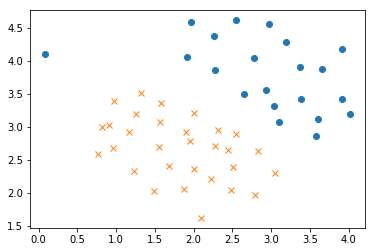

In [74]:
plt.plot(okx, oky, 'o')
plt.plot(nokx,noky,'x')

In [85]:
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)

In [115]:
svc.fit(X, Y)
svc.score(X, Y)
conf = svc.decision_function(X)


C:\Users\Yow-Gwo Wang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 0.79892727,  0.3811957 ,  1.37366533,  0.51896411,  0.33233421,
        0.86710374,  0.6845283 ,  1.60803585,  0.83148647,  1.16321244,
        1.07047497,  0.22837755,  0.32878669,  0.79227269,  0.31366584,
        1.27071521,  1.20750355,  0.99799805,  0.56325084,  0.3880698 ,
       -0.4371618 , -0.31047473, -0.6872153 , -0.55484892, -0.33372982,
       -0.29451604, -0.44082801, -0.98372419, -0.6859239 , -1.32827349,
       -1.00405586, -1.49255825, -0.61259322, -0.68487892, -1.00086572,
       -1.15310441, -1.57817561, -1.35682106, -1.03362052, -1.18639585,
       -0.77338126, -0.76857065, -0.46865209, -1.        , -0.51103967,
       -0.85824247, -1.55810629, -0.25598731, -1.11503066, -1.54789236,
       -0.71310641])

In [117]:
okx=[]
oky=[]
nokx=[]
noky=[]
okc = []
nokc = []
for x, y, con in zip(X,Y,conf):
    if y==1:
        okx.append(x[0])
        oky.append(x[1])
        okc.append(con)
    else:
        nokx.append(x[0])
        noky.append(x[1])
        nokc.append(con)

Text(0.5,1,'c=1 results for classification using SVM')

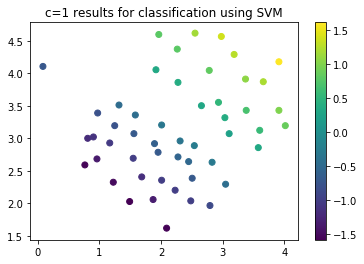

In [140]:
plt.scatter(okx, oky, c=okc)
plt.clim(conf.min(), conf.max())
plt.scatter(nokx,noky,c=nokc)
plt.clim(conf.min(), conf.max())
plt.colorbar()
plt.title('c=1 results for classification using SVM')

In [142]:
svc100 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc100.fit(X, Y)
svc100.score(X, Y)
conf100 = svc100.decision_function(X)


C:\Users\Yow-Gwo Wang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [144]:
okx=[]
oky=[]
nokx=[]
noky=[]
okc = []
nokc = []
for x, y, con in zip(X,Y,conf100):
    if y==1:
        okx.append(x[0])
        oky.append(x[1])
        okc.append(con)
    else:
        nokx.append(x[0])
        noky.append(x[1])
        nokc.append(con)

Text(0.5,1,'c=100 results for classification using SVM')

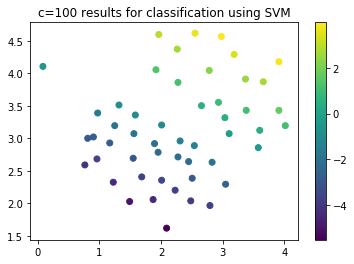

In [145]:
plt.scatter(okx, oky, c=okc)
plt.clim(conf100.min(), conf100.max())
plt.scatter(nokx,noky,c=nokc)
plt.clim(conf100.min(), conf100.max())
plt.colorbar()
plt.title('c=100 results for classification using SVM')

In [184]:
def gaussianKernel(x1, x2, sigma):
    a = ((x1-x2)**2).sum()
    b = np.exp(-a/(2*sigma**2))
    return b

In [195]:
x1=np.asarray((1,2,1))
x2=np.asarray((0,4,-1))

In [197]:
gaussianKernel(x1, x2, 2)

0.32465246735834974

In [199]:
#InputData image & weights
input_data2 = scipy.io.loadmat(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex6\machine-learning-ex6\ex6\ex6data2.mat")
X2 = input_data2['X']
Y2 = input_data2['y']

In [204]:
okx=[]
oky=[]
nokx=[]
noky=[]
for x, y in zip(X2,Y2):
    if y==1:
        okx.append(x[0])
        oky.append(x[1])
    else:
        nokx.append(x[0])
        noky.append(x[1])


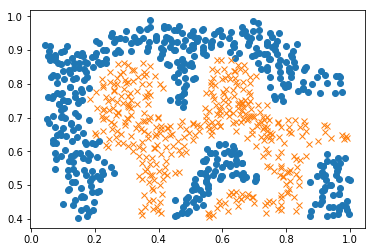

In [205]:
plt.plot(okx, oky, 'o')
plt.plot(nokx,noky,'x')

In [280]:
svcG = svm.SVC(C=100, gamma=10, probability=True)

In [291]:
#Predict_proba output the predict probabilty for each class Y for each input training example
#For our exercise, each training example will has the probabilty to belong to either y=0 or y=1 class
#863 training example, each example has 2 feature, has 1 output y.
svcG.fit(X2, Y2)
conf = svcG.predict_proba(X2)[:,1]

C:\Users\Yow-Gwo Wang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [277]:
okx=[]
oky=[]
nokx=[]
noky=[]
okc = []
nokc = []
for x, y, con in zip(X2,Y2,conf):
    if y==1:
        okx.append(x[0])
        oky.append(x[1])
        okc.append(con)
    else:
        nokx.append(x[0])
        noky.append(x[1])
        nokc.append(con)

In [ ]:
"""Intuitively, the gamma parameter defines how far the influence of a single training example reaches,
with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen
as the inverse of the radius of influence of samples selected by the model as support vectors.

The C parameter trades off correct classification of training examples against maximization of the
decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision
function is better at classifying all training points correctly. A lower C will encourage a larger margin,
therefore a simpler decision function, at the cost of training accuracy. In other words``C`` behaves as a
regularization parameter in the SVM."""

Text(0.5,1,'c=100 and gammea=10 results for classification using SVM')

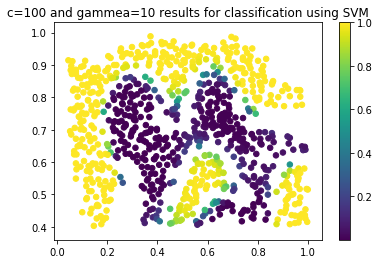

In [278]:
plt.scatter(okx, oky, s=30, c=okc)
plt.clim(conf.min(), conf.max())
plt.scatter(nokx,noky,s=30, c=nokc)
plt.clim(conf.min(), conf.max())
plt.colorbar()
plt.title('c=100 and gammea=10 results for classification using SVM')

In [255]:
#InputData image & weights
input_data3 = scipy.io.loadmat(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex6\machine-learning-ex6\ex6\ex6data3.mat")
X3 = input_data3['X']
Y3 = input_data3['y']
X3val = input_data3['Xval']
Y3val = input_data3['yval']

In [263]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}
for c in C_values:
    for g in gamma_values:
        svcG = svm.SVC(C=c, gamma=g, probability=True)
        svcG.fit(X3, Y3)
        score = svcG.score(X3val, Y3val)
        if score > best_score:
            best_score = score
            best_params['C'] = c
            best_params['gamma'] = g

print(best_score)
print(best_params)

C:\Users\Yow-Gwo Wang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.965
{'C': 0.3, 'gamma': 100}


In [292]:
svcG = svm.SVC(C=best_params['C'], gamma=best_params['gamma'], probability=True)
svcG.fit(X3, Y3)
conf = svcG.predict_proba(X3val)[:,1]

C:\Users\Yow-Gwo Wang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [293]:
okx=[]
oky=[]
nokx=[]
noky=[]
okc = []
nokc = []
for x, y, con in zip(X3val,Y3val,conf):
    if y==1:
        okx.append(x[0])
        oky.append(x[1])
        okc.append(con)
    else:
        nokx.append(x[0])
        noky.append(x[1])
        nokc.append(con)

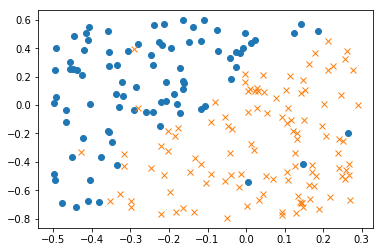

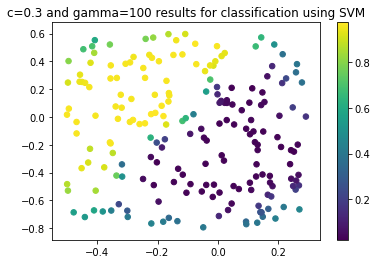

In [296]:
plt.plot(okx, oky, 'o')
plt.plot(nokx,noky,'x')
plt.show()
plt.scatter(okx, oky, s=30, c=okc)
plt.clim(conf.min(), conf.max())
plt.scatter(nokx,noky,s=30, c=nokc)
plt.clim(conf.min(), conf.max())
plt.colorbar()
plt.title('c=0.3 and gamma=100 results for classification using SVM')

plt.show()